In [185]:
import pandas as pd
import numpy as np

from datasets import load_dataset

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [186]:
# Cargar el archivo .jsonl
df_human = pd.read_json('data/machines/gemini-pro.jsonl', lines=True)
df_machine = pd.read_json('data/human.jsonl', lines=True)

# Mostrar las primeras filas del DataFrame
df_human.head()
df_machine.head()

,id,text
0,articles-cleaned-truncated/news-2021-01-01-202...,Inaugural Address by President Joseph R. Biden...
1,articles-cleaned-truncated/news-2021-01-01-202...,Fact check: Biden inauguration impacted by pan...
2,articles-cleaned-truncated/news-2021-01-01-202...,Highlights from Joe Biden's 2021 inauguration\...
3,articles-cleaned-truncated/news-2021-01-01-202...,"Biden takes the helm, appeals for unity to tak..."
4,articles-cleaned-truncated/news-2021-01-01-202...,'The Hill We Climb': Read Amanda Gorman's inau...


In [187]:
df_human["id"]=df_human["id"].str.split('/').str[1:].str.join('/')
df_human

,id,text
0,news-2021-01-01-2021-12-31-bideninauguration/a...,Biden's Inaugural Address: A Clarion Call for ...
1,news-2021-01-01-2021-12-31-bideninauguration/a...,Biden's Inauguration: Fact-Checking Crowd Size...
2,news-2021-01-01-2021-12-31-bideninauguration/a...,"Biden Inaugurated as 46th President, Vowing Un..."
3,news-2021-01-01-2021-12-31-bideninauguration/a...,"Biden Inaugurated as 46th President, Calls for..."
4,news-2021-01-01-2021-12-31-bideninauguration/a...,Amanda Gorman's Inaugural Poem: A Beacon of Ho...
...,...,...
1082,news-2021-01-01-2021-12-31-wyominggabbypetito/...,Gabby Petito Case: Social Media Detectives Pla...
1083,news-2021-01-01-2021-12-31-wyominggabbypetito/...,Missing Woman: Search Intensifies for Gabby Pe...
1084,news-2021-01-01-2021-12-31-wyominggabbypetito/...,Laundrie Allegedly Hitchhiked in Wyoming Days ...
1085,news-2021-01-01-2021-12-31-wyominggabbypetito/...,Gabby Petito's Case: The Murky Role of Social ...


In [188]:
df_machine["id"] = df_machine["id"].str.split('/').str[1:].str.join('/')
df_machine

,id,text
0,news-2021-01-01-2021-12-31-bideninauguration/a...,Inaugural Address by President Joseph R. Biden...
1,news-2021-01-01-2021-12-31-bideninauguration/a...,Fact check: Biden inauguration impacted by pan...
2,news-2021-01-01-2021-12-31-bideninauguration/a...,Highlights from Joe Biden's 2021 inauguration\...
3,news-2021-01-01-2021-12-31-bideninauguration/a...,"Biden takes the helm, appeals for unity to tak..."
4,news-2021-01-01-2021-12-31-bideninauguration/a...,'The Hill We Climb': Read Amanda Gorman's inau...
...,...,...
1082,news-2021-01-01-2021-12-31-wyominggabbypetito/...,How amateur detectives on social media helped ...
1083,news-2021-01-01-2021-12-31-wyominggabbypetito/...,Authorities searching for missing 22-year-old ...
1084,news-2021-01-01-2021-12-31-wyominggabbypetito/...,Univ. of Wisconsin Oshkosh student helping Gab...
1085,news-2021-01-01-2021-12-31-wyominggabbypetito/...,Did the Internet Actually Help Find Gabby Peti...


In [189]:
# Cargar los archivos JSONL en dataframes
df_human = pd.read_json('data/human.jsonl', lines=True)
df_ai = pd.read_json('data/machines/gemini-pro.jsonl', lines=True)

# Agregar la columna 'Type' con el valor 'Human' o 'AI'
df_human['label'] = 0
df_ai['label'] = 1

df_human['label']=df_human['label'].astype(np.int8)
df_ai['label']=df_ai['label'].astype(np.int8)

# Unir ambos dataframes en uno solo
df_combined = pd.concat([df_human, df_ai], ignore_index=True)
df_combined["id"] = df_combined["id"].str.split('/').str[1:].str.join('/')
df_combined = df_combined.drop(df_combined.columns[0], axis=1)
df_combined.to_json('output.json', orient='records', lines=True)
df_combined

,text,label
0,Inaugural Address by President Joseph R. Biden...,0
1,Fact check: Biden inauguration impacted by pan...,0
2,Highlights from Joe Biden's 2021 inauguration\...,0
3,"Biden takes the helm, appeals for unity to tak...",0
4,'The Hill We Climb': Read Amanda Gorman's inau...,0
...,...,...
2169,Gabby Petito Case: Social Media Detectives Pla...,1
2170,Missing Woman: Search Intensifies for Gabby Pe...,1
2171,Laundrie Allegedly Hitchhiked in Wyoming Days ...,1
2172,Gabby Petito's Case: The Murky Role of Social ...,1


In [190]:
emotions_local = load_dataset("json", data_files="output.json")

df = pd.DataFrame(emotions_local['train']) 

# Separa en train y test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Muestra la cantidad de ejemplos en cada conjunto
print(f"Número de ejemplos en el conjunto de entrenamiento: {len(train_df)}")
print(f"Número de ejemplos en el conjunto de prueba: {len(test_df)}")

display(train_df.sample(5))
display(test_df.sample(5))

Generating train split: 2174 examples [00:00, 147187.57 examples/s]

Número de ejemplos en el conjunto de entrenamiento: 1739
Número de ejemplos en el conjunto de prueba: 435


,text,label
155,Final goodbye: Recalling influential people wh...,0
1036,Texas' winter storm could make life worse for ...,0
1158,"House Panel Subpoenas Proud Boys, Oath Keepers...",1
25,Jesuit priest who presided at Joe Biden's inau...,0
1170,Trump's Incitement Blamed for Capitol Riot Dea...,1


,text,label
382,Facebook's massive outage costs the company an...,0
916,Tom Brady is launching a clothing brand with o...,0
1798,"Tragedy at Austin-East: Student Killed, Office...",1
507,Governor Hochul and FEMA Announce Approval for...,0
105,Andrew Cuomo: Report places a new spotlight on...,0


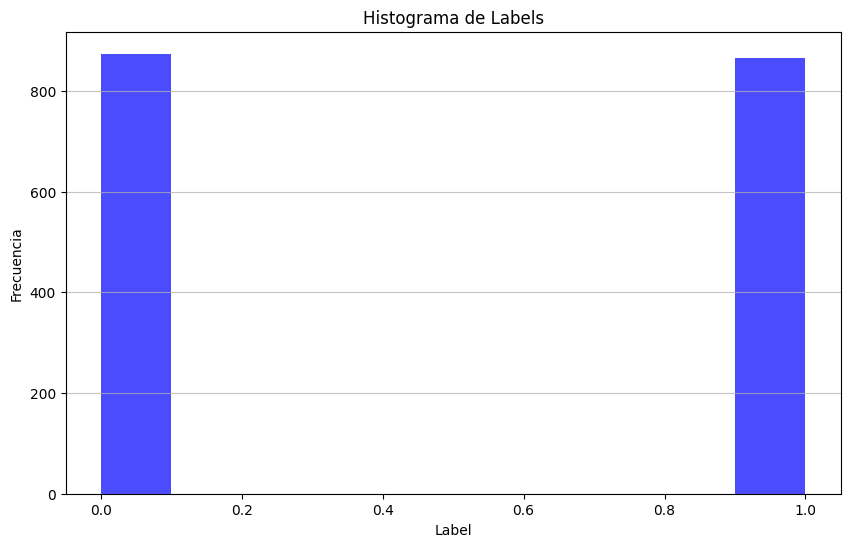

In [195]:
plt.figure(figsize=(10, 6))
plt.hist(train_df["label"], color='blue', alpha=0.7)
plt.title('Histograma de Labels')
plt.xlabel('Label')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
# plt.xticks(range(train_df["label"].min(), train_df["label"].max() + 1))
plt.show()